# Importing the required libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


sns.set(style='white', context='notebook', palette='deep')

In [0]:
import os
from shutil import copyfile
from os import getcwd
import random
import shutil
import zipfile

In [0]:
import cv2

# Defining the classifier model

In [0]:
def DevModel(input_shape):
  X_input = Input(input_shape)
  X = X_input
  
  #Layer 1 - Conv>BN>RELU>MaxPool
  
  X = Conv2D(64,(5,5),strides = (1,1), name = 'conv0', padding = 'same')(X)
  X = BatchNormalization(axis = 3, name = 'bn0')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2),strides = (2,2), name = 'maxpool0')(X)
  X = Dropout(rate = 0.25)(X)
  
  #Layer 2 - Conv>BN>RELU>MaxPool
  
  X = Conv2D(32,(3,3),strides = (1,1), name = 'conv1', padding = 'valid')(X)
  X = BatchNormalization(axis = 3, name = 'bn1')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2),strides = (2,2), name = 'maxpool1')(X)
  X = Dropout(rate = 0.25)(X)
  
  #Layer 3 - Conv>BN>RELU>MaxPool

  X = Conv2D(16,(3,3),strides = (1,1), name = 'conv2', padding = 'same')(X)
  X = BatchNormalization(axis = 3, name = 'bn2')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2),strides = (2,2), name = 'maxpool2')(X)
  X = Dropout(rate = 0.25)(X)
  
  #FC layers with flattening

  X = Flatten()(X)
  X = Dense(128, activation = 'relu', name = 'fc1')(X)
  X = Dropout(rate = 0.25)(X)
  X = Dense(32, activation = 'relu', name = 'fc2')(X)
  X = Dropout(rate = 0.5)(X)
  X = Dense(10, activation = 'softmax', name = 'preds')(X)
  
  #model instance creator
  model = Model(inputs = X_input, outputs = X, name = 'DevModel')
  
  return model

# Loading the data and other operations

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip

--2020-05-18 16:54:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80417803 (77M) [application/x-httpd-php]
Saving to: ‘DevanagariHandwrittenCharacterDataset.zip.1’

DevanagariHandwritt 100%[===================>]  76.69M  21.1MB/s    in 4.6s    

2020-05-18 16:54:51 (16.6 MB/s) - ‘DevanagariHandwrittenCharacterDataset.zip.1’ saved [80417803/80417803]



In [0]:
path_to_zip = "/content/DevanagariHandwrittenCharacterDataset.zip"

local_zip = path_to_zip
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

**Deleting to create a subset**

In [0]:
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_10_yna')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_14_dhaa')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_17_tha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_18_da')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_19_dha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_20_na')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_22_pha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_24_bha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_25_ma')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_26_yaw')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_28_la')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_29_waw')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_2_kha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_30_motosaw')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_31_petchiryakha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_32_patalosaw')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_33_ha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_34_chhya')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_35_tra')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_36_gya')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_3_ga')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_4_gha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_5_kna')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_7_chha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_8_ja')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/character_9_jha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/digit_0')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/digit_1')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/digit_2')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/digit_3')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/digit_4')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/digit_5')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/digit_6')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/digit_7')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/digit_8')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Test/digit_9')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_10_yna')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_14_dhaa')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_17_tha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_18_da')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_19_dha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_20_na')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_22_pha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_24_bha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_25_ma')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_26_yaw')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_28_la')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_29_waw')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_2_kha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_30_motosaw')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_31_petchiryakha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_32_patalosaw')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_33_ha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_34_chhya')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_35_tra')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_36_gya')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_3_ga')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_4_gha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_5_kna')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_7_chha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_8_ja')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/character_9_jha')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/digit_0')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/digit_1')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/digit_2')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/digit_3')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/digit_4')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/digit_5')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/digit_6')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/digit_7')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/digit_8')
shutil.rmtree('/content/data/DevanagariHandwrittenCharacterDataset/Train/digit_9')

# Training and Validation

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
TRAINING_DIR = '/content/data/DevanagariHandwrittenCharacterDataset/Train'

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    target_size = (32,32),
                                                    batch_size = 500,
                                                    color_mode='grayscale',
                                                    class_mode = 'categorical')

VALIDATION_DIR = '/content/data/DevanagariHandwrittenCharacterDataset/Test'

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                    target_size = (32,32),
                                                    batch_size = 500,
                                                    color_mode='grayscale',
                                                    class_mode = 'categorical',
                                                    shuffle=False)

Found 17000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


In [0]:
input_shape = [32,32,1]
devModel = DevModel(input_shape)
devModel.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history = devModel.fit(train_generator,
                              epochs=50,
                              steps_per_epoch = 50,
                              validation_data = validation_generator,
                              validation_steps = 6,
                              verbose=1,
                              callbacks = my_callbacks)

Epoch 1/50
50/50 [==============================] - 12s 234ms/step - loss: 2.3996 - accuracy: 0.1080 - val_loss: 2.3022 - val_accuracy: 0.0900
Epoch 2/50
50/50 [==============================] - 12s 233ms/step - loss: 2.2642 - accuracy: 0.1465 - val_loss: 2.3311 - val_accuracy: 0.1000
Epoch 3/50
50/50 [==============================] - 11s 230ms/step - loss: 2.0739 - accuracy: 0.2218 - val_loss: 2.7312 - val_accuracy: 0.1047
Epoch 4/50
50/50 [==============================] - 11s 230ms/step - loss: 1.7829 - accuracy: 0.3104 - val_loss: 3.4290 - val_accuracy: 0.0993
Epoch 5/50
50/50 [==============================] - 11s 228ms/step - loss: 1.5737 - accuracy: 0.3977 - val_loss: 3.8091 - val_accuracy: 0.0967
Epoch 6/50
50/50 [==============================] - 12s 237ms/step - loss: 1.3921 - accuracy: 0.4772 - val_loss: 3.6501 - val_accuracy: 0.1507
Epoch 7/50
50/50 [==============================] - 11s 228ms/step - loss: 1.2136 - accuracy: 0.5562 - val_loss: 2.6018 - val_accuracy: 0.1883

# Plotting the loss and accuracy graphs

Text(0.5, 1.0, 'Training and validation loss')

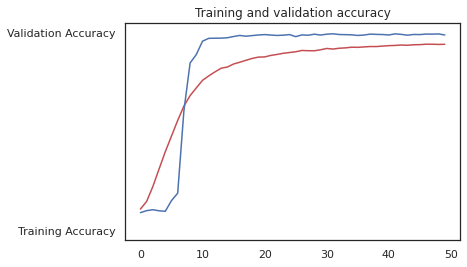

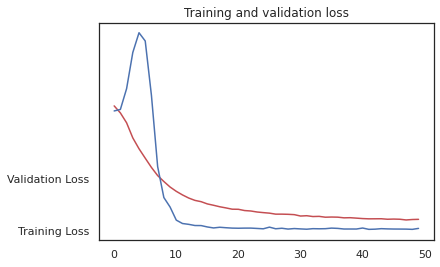

In [0]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
Y_pred = devModel.predict_generator(validation_generator, verbose = 1, steps = 3000//500)
y_pred = np.argmax(Y_pred, axis = 1)

class_labels = {v: k for k, v in validation_generator.class_indices.items()}

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

6/6 [==============================] - 0s 70ms/step
Confusion Matrix
[[298   1   0   0   0   0   0   0   1   0]
 [  0 300   0   0   0   0   0   0   0   0]
 [  0   3 296   0   0   0   0   1   0   0]
 [  0   0   0 299   0   0   1   0   0   0]
 [  0   0   0   0 300   0   0   0   0   0]
 [  0   0   0   0   0 300   0   0   0   0]
 [  0   0   0   0   0   0 298   0   0   2]
 [  0   1   0   0   1   0   0 297   0   1]
 [  0   1   0   0   0   0   0   0 299   0]
 [  0   0   0   0   0   2   3   0   0 295]]
Classification Report
                       precision    recall  f1-score   support

character_11_taamatar       1.00      0.99      1.00       300
    character_12_thaa       0.98      1.00      0.99       300
     character_13_daa       1.00      0.99      0.99       300
    character_15_adna       1.00      1.00      1.00       300
  character_16_tabala       1.00      1.00      1.00       300
       character_1_ka       0.99      1.00      1.00       300
      character_21_pa       0.99    

**Visualing the results**

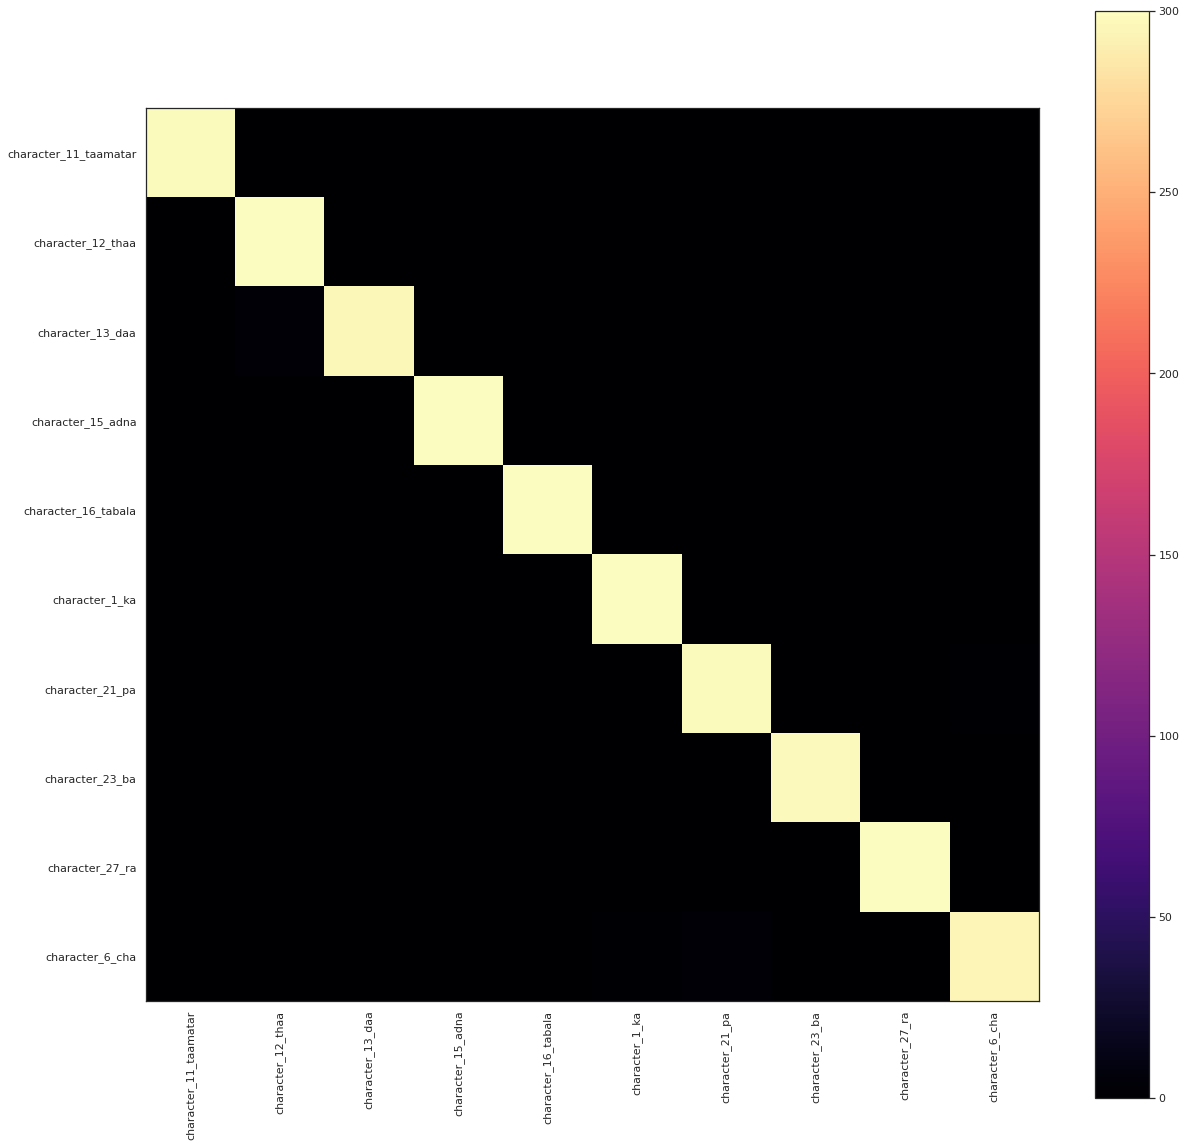

In [0]:
plt.figure(figsize=(20, 20)) 
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)
plt.imshow(cnf_matrix, interpolation='nearest', cmap="magma")
plt.colorbar()
classes = list(class_labels.values())
tick_marks = np.arange(len(classes)) 
_ = plt.xticks(tick_marks, classes, rotation=90) 
_ = plt.yticks(tick_marks, classes)

# Saving the logs and weights

In [0]:
shutil.copytree('/content/logs/', '/content/drive/My Drive/classifier_log_new_1')

'/content/drive/My Drive/classifier_log_new_1'

In [0]:
shutil.copy('/content/model.50-0.04.h5', '/content/drive/My Drive/classifier_weights_epoch50-loss0.04_new_1.h5')

'/content/drive/My Drive/classifier_weights_epoch50-loss0.04_new_1.h5'

# Evaluating GAN output

In [0]:
# input_shape = [32,32,1]
# devModel = DevModel(input_shape)

In [0]:
gan_data_path = '/content/drive/My Drive/gan_data/'
val_datagen = ImageDataGenerator(rescale=1./255)
val_gen = val_datagen.flow_from_directory(gan_data_path, 
                                          target_size = (32,32),
                                          batch_size = 20,
                                          color_mode='grayscale',
                                          class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


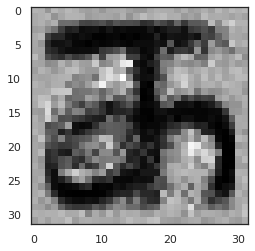

In [0]:
img = cv2.imread('/content/drive/My Drive/gan_data/character_1_ka/32.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

**Loading the best weights**

In [0]:
devModel.load_weights('/content/model.49-0.02.h5') 

**Evaluating with the GAN generated dataset**

In [0]:
hist = devModel.evaluate(val_gen, steps = 50, batch_size = 20)

50/50 [==============================] - 1s 23ms/step - loss: 21.9342 - accuracy: 0.1230


# Experimentation

Creating a list of all GAN generated images

In [0]:
listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(gan_data_path):
  listOfFiles += [os.path.join(dirpath, file) for file in filenames]

Experimenting on one image

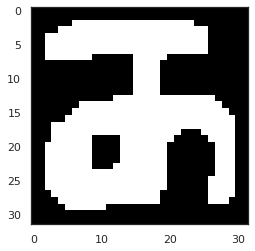

In [0]:
img_0_orig = cv2.imread('/content/drive/My Drive/gan_data/character_01_ka/32.png', cv2.IMREAD_GRAYSCALE)
img_0 = (img_0_orig)
blur = cv2.GaussianBlur(img_0,(3,3),0)
#sharp_mask = np.subtract(img_0, blur)
#img_0 = cv2.addWeighted(img_0,1, sharp_mask,10, 0)
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel_1 = np.ones((3,3),np.uint8)
kernel_2 = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel_1)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_2)
mask = cv2.bitwise_not(closing)
# img = cv2.add(img_0_orig,mask)
# blur_1 = cv2.GaussianBlur(img, (3,3), 0)
# sharp_mask_1 = np.subtract(img,blur_1)
# sharp_mask_1 = cv2.GaussianBlur(sharp_mask_1, (3,3), 0)
# img = cv2.addWeighted(img,1,sharp_mask_1,-10, 0)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(mask, cmap='gray', vmin=0, vmax=255)

In [0]:
dir_list = os.listdir(path = '/content/drive/My Drive/gan_data/')

In [0]:
dir_list

In [0]:
shutil.rmtree('/content/new_gan_data')

In [0]:
for d in dir_list:
  os.makedirs('/content/new_gan_data/'+d)
os.listdir('/content/new_gan_data/')

**Cleaning the whole dataset**

In [0]:
#listOfFiles
done = 0
for f in listOfFiles:
  img_0_orig = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
  img_0 = (img_0_orig)
  blur = cv2.GaussianBlur(img_0,(3,3),0)
  sharp_mask = np.subtract(img_0, blur)
  ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  kernel_1 = np.ones((3,3),np.uint8)
  kernel_2 = np.ones((3,3),np.uint8)
  opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel_1)
  closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_2)
  mask = cv2.bitwise_not(closing)
  name = f.split('/')[-1]
  name_dir = f.split('/')[-2]
  cv2.imwrite('/content/new_gan_data/'+name_dir+'/'+name, mask)
  done += 1
  if (done%10 == 0) :
    print(str(done)+"/"+str(len(listOfFiles)))

10/1000
20/1000
30/1000
40/1000
50/1000
60/1000
70/1000
80/1000
90/1000
100/1000
110/1000
120/1000
130/1000
140/1000
150/1000
160/1000
170/1000
180/1000
190/1000
200/1000
210/1000
220/1000
230/1000
240/1000
250/1000
260/1000
270/1000
280/1000
290/1000
300/1000
310/1000
320/1000
330/1000
340/1000
350/1000
360/1000
370/1000
380/1000
390/1000
400/1000
410/1000
420/1000
430/1000
440/1000
450/1000
460/1000
470/1000
480/1000
490/1000
500/1000
510/1000
520/1000
530/1000
540/1000
550/1000
560/1000
570/1000
580/1000
590/1000
600/1000
610/1000
620/1000
630/1000
640/1000
650/1000
660/1000
670/1000
680/1000
690/1000
700/1000
710/1000
720/1000
730/1000
740/1000
750/1000
760/1000
770/1000
780/1000
790/1000
800/1000
810/1000
820/1000
830/1000
840/1000
850/1000
860/1000
870/1000
880/1000
890/1000
900/1000
910/1000
920/1000
930/1000
940/1000
950/1000
960/1000
970/1000
980/1000
990/1000
1000/1000


**Creating a generator with the cleaned data**

In [0]:
new_gan_data = '/content/new_gan_data/'
val_datagen = ImageDataGenerator(rescale=1./255)
val_gen = val_datagen.flow_from_directory(new_gan_data, 
                                          target_size = (32,32),
                                          color_mode='grayscale',
                                          class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [0]:
hist = devModel.evaluate(val_gen, steps = 50, batch_size = 20)

50/50 [==============================] - 0s 7ms/step - loss: 1.7370 - accuracy: 0.8692
